In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob

# 1) Load Data

In [2]:
os.chdir("D:/GitHub/PyomoModels/08_SEST2022_DA_EQ/Results2")

In [3]:
os.getcwd()

'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2'

In [4]:
print(glob.glob(os.getcwd()+"\*\*\Model_Data*.csv"))

['D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_1_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_2_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_3_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_4_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_5_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_6_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_7_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Results2\\Fixed_EVs\\Model_CSV_AHE\\Model_data_DA_8_20211126-011235.csv', 'D:\\GitHub\\PyomoModels\\08_SEST2022_DA_EQ\\Re

In [5]:
scenarios =['Fixed_PVs', 'Fixed_EVs', 'Mixed']
algorithms  = ['AHE', 'Diag']

df_PVs_Diag =[]
df_PVs_AHE =[]
df_EVs_AHE =[]
df_EVs_Diag =[]
df_Mixed_Diag =[]
df_Mixed_AHE =[]

header_list = ['Iteration', 'DAs_load', 'DAs_generation',
       'DAs_demand_bid', 'DAs_supply_offer', 'EVs_Charge',
       'EVs_Discharge', 'TCL_Power', 'SL_Power', 'Inflexible_loads',
       'Solar_Power', 'Gen1', 'Gen2', 'Gen3', 'Gen4', 'CDA1_supply',
       'CDA2_supply', 'CDA3_supply', 'CDA4_supply', 'CDA5_supply',
       'CDA6_supply', 'CDA7_supply', 'CDA8_supply', 'CDA1_demand',
       'CDA2_demand', 'CDA3_demand', 'CDA4_demand', 'CDA5_demand',
       'CDA6_demand', 'CDA7_demand', 'CDA8_demand', 'Bus1_price', 'Bus2_price',
       'Bus3_price', 'Bus4_price', 'Bus5_price', 'Bus6_price', 'Theta_bus_1',
       'Theta_bus_2', 'Theta_bus_3', 'Theta_bus_4', 'Theta_bus_5',
       'Theta_bus_6']

df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]

In [6]:
# df_EVs_Diag[0].head()

In [7]:
counter = 0
for s in scenarios:
    for a in algorithms:
        df = df_all[counter]
        CSV_List = glob.glob(os.getcwd()+"\\" + s +"\*"+a+"\Model_Data*.csv")
        for f in CSV_List:
            df.append(pd.read_csv(f,names=header_list, header=0))
        counter+=1




In [8]:
for dfs in df_all:
    for df in dfs:
        df.drop(df[df.Iteration==0].index, inplace=True)

In [9]:
# Time slot list to add as new column
time_slot =[16+x for x in range(0,24)]

for dfs in df_all:
    for df in dfs:
        df['Time']= int(df.shape[0]/24)*time_slot

In [10]:
# Create List of DAs
DAs_list = ['DA'+str(x) for x in range(1,10)]

# 2) Fixed PVs scenario

## 2.1) Diagonalization algorithm Solar Power

In [11]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]


In [12]:
# df_PVs_Diag[0][['EVs_Charge', 'EVs_Discharge', 'Inflexible_loads','Time','Solar_Power']].groupby('Time').mean().reset_index()

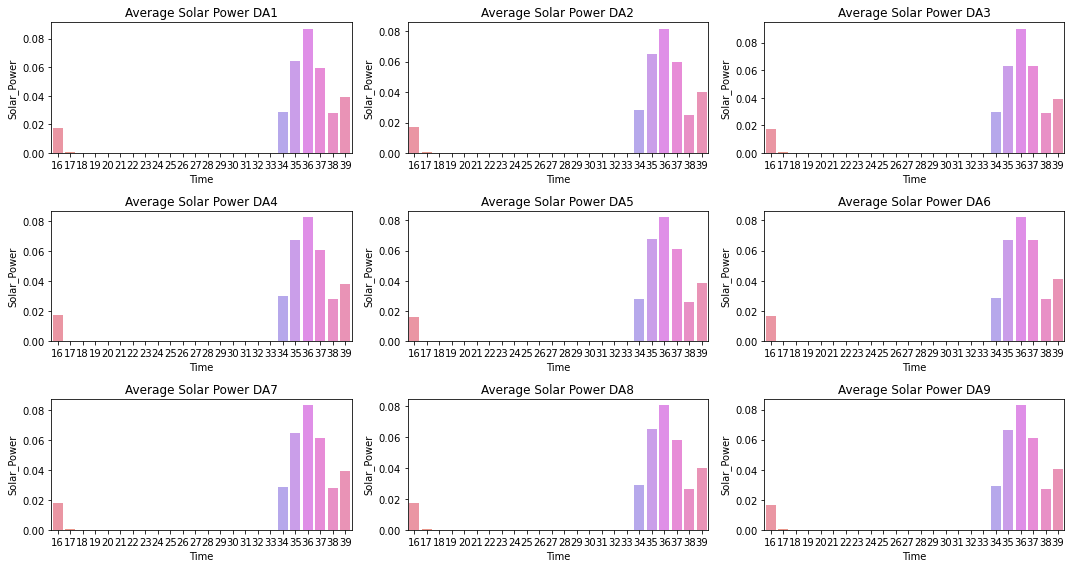

In [13]:
fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_Diag)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = df[['Solar_Power','Time']].groupby('Time').mean().reset_index(),
                x='Time', y='Solar_Power', ax=ax[i,j])
    ax[i,j].set_title('Average Solar Power ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()




<AxesSubplot:xlabel='Time', ylabel='Solar_Power'>

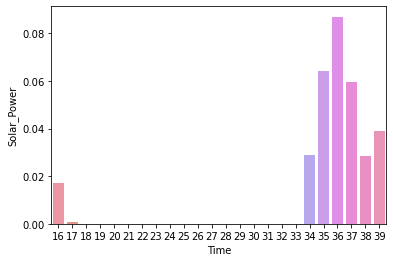

In [14]:
sns.barplot (data =df_PVs_Diag[0][['Solar_Power','Time']].groupby('Time').mean().reset_index(),
             x='Time', y='Solar_Power')

## 2.2) Diagonalization Algorithm EVS Discharge and EVs_Charge

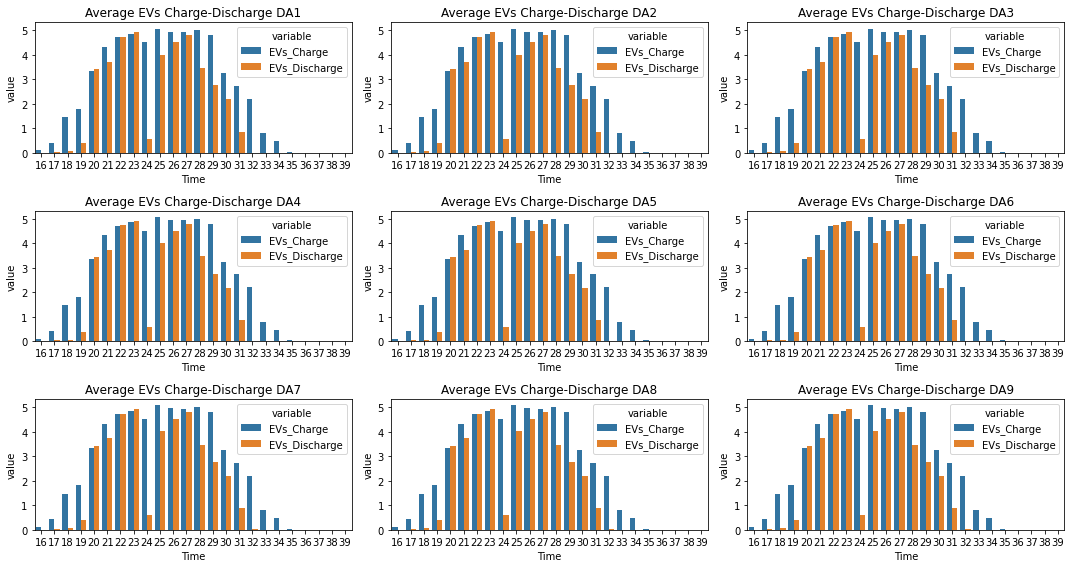

In [15]:
fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_Diag)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = pd.melt(df_PVs_Diag[0][['EVs_Charge', 'EVs_Discharge', 'Time']].groupby('Time').mean().reset_index(),
                                id_vars=['Time']),
                x='Time', y='value', hue='variable', ax=ax[i,j])
    ax[i,j].set_title('Average EVs Charge-Discharge ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()


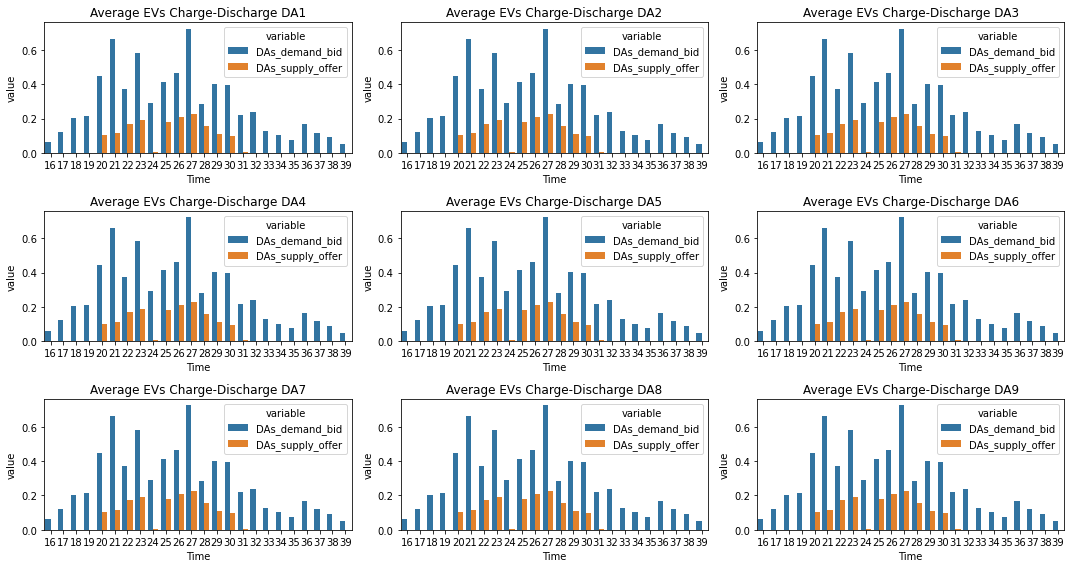

In [16]:
fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_Diag)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = pd.melt(df_PVs_Diag[0][['DAs_demand_bid', 'DAs_supply_offer', 'Time']].groupby('Time').mean().reset_index(),
                                id_vars=['Time']),
                x='Time', y='value', hue='variable', ax=ax[i,j])
    ax[i,j].set_title('Average EVs Charge-Discharge ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()


## 2.3) AHE Algorithm

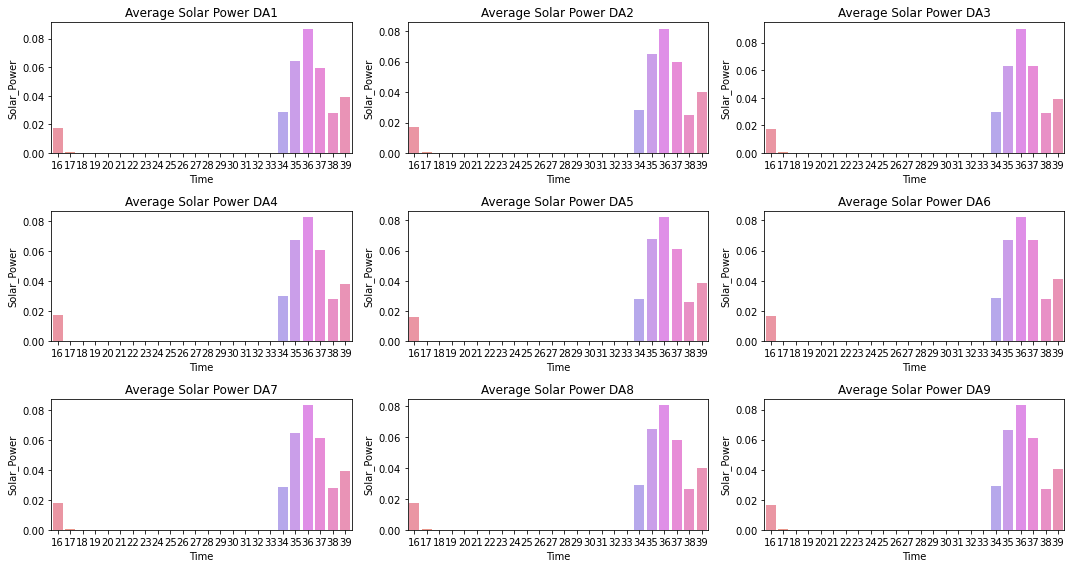

In [17]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]

fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_AHE)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = df[['Solar_Power','Time']].groupby('Time').mean().reset_index(),
                x='Time', y='Solar_Power', ax=ax[i,j])
    ax[i,j].set_title('Average Solar Power ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()

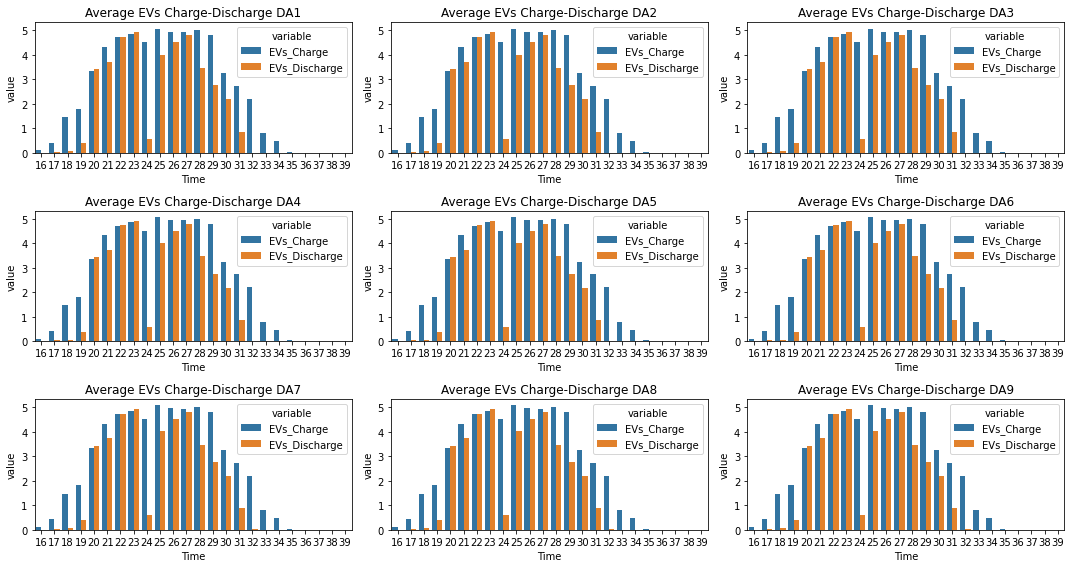

In [18]:
fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_AHE)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = pd.melt(df_PVs_Diag[0][['EVs_Charge', 'EVs_Discharge', 'Time']].groupby('Time').mean().reset_index(),
                                id_vars=['Time']),
                x='Time', y='value', hue='variable', ax=ax[i,j])
    ax[i,j].set_title('Average EVs Charge-Discharge ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()

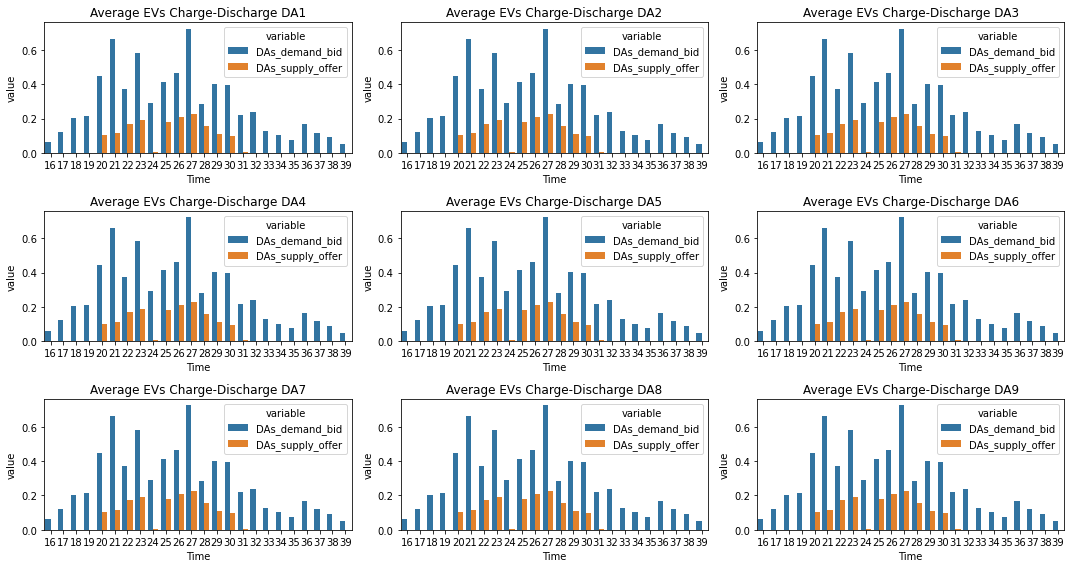

In [19]:
fig = plt.figure(figsize=(15,8)) #figsize=(8,6)
ax = fig.subplots(3,3)

i=0
j=0

for df_idx in range(len(df_PVs_AHE)):
    if (df_idx % 3 == 0 and df_idx > 0):
        i+=1
    j = df_idx % 3
    
    df = df_PVs_Diag[df_idx]
    sns.barplot(data = pd.melt(df_PVs_Diag[0][['DAs_demand_bid', 'DAs_supply_offer', 'Time']].groupby('Time').mean().reset_index(),
                                id_vars=['Time']),
                x='Time', y='value', hue='variable', ax=ax[i,j])
    ax[i,j].set_title('Average EVs Charge-Discharge ' +DAs_list[df_idx], fontsize=12)

plt.tight_layout()    
plt.show()

# 3)  Concatenated all DAs Scenarios Data based on Algorithm and Scenario 

In [20]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# First Data Frame Fixed PVs and AHE algorithm

df_list=[]

for df in df_PVs_AHE:
    df_list.append(df.groupby('Time').mean().reset_index())

df_PVs_AHE_mean = pd.concat(df_list)

df_PVs_AHE_mean  = df_PVs_AHE_mean.groupby('Time').mean().reset_index()

df_PVs_AHE_mean['Scenario'] =['Fixed_PVs']*24
df_PVs_AHE_mean['Algorithm'] =['AHE']*24

In [21]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# Second DataFrame Fixed_PVS and Diag algorithm

df_list=[]

for df in df_PVs_Diag:
    df_list.append(df.groupby('Time').mean().reset_index())

df_PVs_Diag_mean = pd.concat(df_list)

df_PVs_Diag_mean  = df_PVs_Diag_mean.groupby('Time').mean().reset_index()

df_PVs_Diag_mean['Scenario'] =['Fixed_PVs']*24
df_PVs_Diag_mean['Algorithm'] =['Diag']*24

In [22]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# Third DataFrame Fixed_EVS and AHE algorithm

df_list=[]

for df in df_EVs_AHE:
    df_list.append(df.groupby('Time').mean().reset_index())

df_EVs_AHE_mean = pd.concat(df_list)

df_EVs_AHE_mean  = df_EVs_AHE_mean.groupby('Time').mean().reset_index()

df_EVs_AHE_mean['Scenario'] =['Fixed_EVs']*24
df_EVs_AHE_mean['Algorithm'] =['AHE']*24

In [23]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# Fourth DataFrame Fixed_EVS and Diag algorithm

df_list=[]

for df in df_EVs_Diag:
    df_list.append(df.groupby('Time').mean().reset_index())

df_EVs_Diag_mean = pd.concat(df_list)

df_EVs_Diag_mean = df_EVs_Diag_mean.groupby('Time').mean().reset_index()

df_EVs_Diag_mean['Scenario'] =['Fixed_EVs']*24
df_EVs_Diag_mean['Algorithm'] =['Diag']*24

In [24]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# Fifth DataFrame Mixed_EVS and AHE algorithm

df_list=[]

for df in df_Mixed_AHE:
    df_list.append(df.groupby('Time').mean().reset_index())

df_Mixed_AHE_mean = pd.concat(df_list)

df_Mixed_AHE_mean = df_Mixed_AHE_mean.groupby('Time').mean().reset_index()

df_Mixed_AHE_mean['Scenario'] =['Mixed']*24
df_Mixed_AHE_mean['Algorithm'] =['AHE']*24

In [25]:
# df_all = [df_PVs_AHE, df_PVs_Diag, df_EVs_AHE, df_EVs_Diag, df_Mixed_AHE , df_Mixed_Diag]
# Six DataFrame Mixed_EVS and Diag algorithm

df_list=[]

for df in df_Mixed_Diag:
    df_list.append(df.groupby('Time').mean().reset_index())

df_Mixed_Diag_mean = pd.concat(df_list)

df_Mixed_Diag_mean = df_Mixed_Diag_mean.groupby('Time').mean().reset_index()

df_Mixed_Diag_mean['Scenario'] =['Mixed']*24
df_Mixed_Diag_mean['Algorithm'] =['AHE']*24

In [26]:
df_all_mean = pd.concat([df_PVs_AHE_mean, df_PVs_Diag_mean, df_EVs_AHE_mean, df_EVs_Diag_mean, df_Mixed_AHE_mean, df_Mixed_Diag_mean])

In [27]:
df_all_mean

,Time,Iteration,DAs_load,DAs_generation,DAs_demand_bid,DAs_supply_offer,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,...,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6,Scenario,Algorithm
0,16,7.0,0.061826,0.000000,0.061826,0.000000,0.079577,0.007377,0.0,0.009869,...,15.000000,15.000000,0.0,-0.057782,-0.067184,-0.074678,-0.080126,-0.071759,Fixed_PVs,AHE
1,17,7.0,0.284228,0.000000,0.284228,0.000000,0.896489,0.004445,0.0,1.081670,...,15.000000,15.000000,0.0,-0.232828,-0.268163,-0.314503,-0.339574,-0.285353,Fixed_PVs,AHE
2,18,7.0,0.420255,0.005045,0.420255,0.005045,1.216233,0.579103,0.0,1.714964,...,17.136752,17.136752,0.0,-0.119774,-0.143483,-0.145371,-0.157486,-0.155017,Fixed_PVs,AHE
3,19,7.0,0.480226,0.018211,0.480226,0.018211,1.861450,0.785874,0.0,1.476244,...,16.982906,16.982906,0.0,-0.121361,-0.150110,-0.129910,-0.141552,-0.164095,Fixed_PVs,AHE
4,20,7.0,0.503301,0.036352,0.503301,0.036352,2.198531,1.185234,0.0,1.505353,...,17.025641,17.025641,0.0,-0.149965,-0.188064,-0.137380,-0.151274,-0.206598,Fixed_PVs,AHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,35,150.5,0.120975,0.000000,0.120975,0.000000,0.113148,0.000000,0.0,1.275388,...,15.011111,15.011111,0.0,-0.100289,-0.116848,-0.128358,-0.134385,-0.124904,Mixed,AHE
20,36,150.5,0.103820,0.000000,0.103820,0.000000,0.000000,0.000000,0.0,1.153476,...,15.000000,15.000000,0.0,-0.090880,-0.108372,-0.103065,-0.113794,-0.116881,Mixed,AHE
21,37,150.5,0.119133,0.000000,0.119133,0.000000,0.000000,0.000000,0.0,1.428288,...,15.000000,15.000000,0.0,-0.100403,-0.117565,-0.125376,-0.141116,-0.125914,Mixed,AHE
22,38,150.5,0.103328,0.000000,0.103328,0.000000,0.000000,0.000000,0.0,1.069144,...,15.000000,15.000000,0.0,-0.085455,-0.099482,-0.109800,-0.121938,-0.106306,Mixed,AHE


## 3.1) Plot Bar Charts

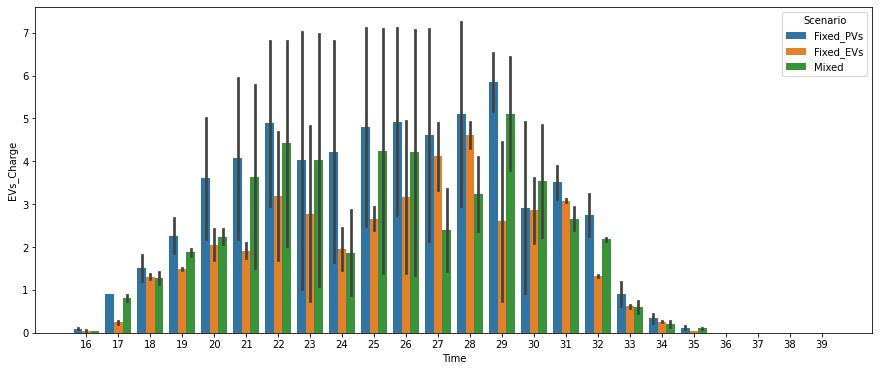

In [28]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_mean, x='Time', y='EVs_Charge', hue="Scenario" , ax=ax)

ax.plot()
plt.show()

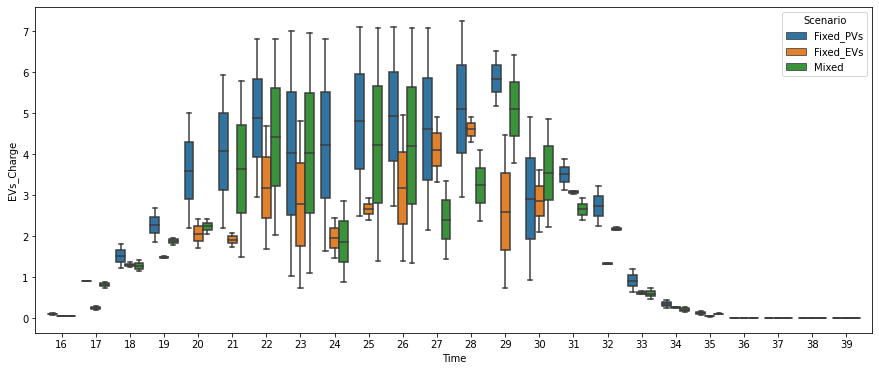

In [29]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=df_all_mean, x='Time', y='EVs_Charge', hue="Scenario" , ax=ax)

ax.plot()
plt.show()

# 4)  Concatenated all DAs Scenarios Data based on Algorithm and Scenario 

In [30]:
df_all = [df_PVs_AHE, df_EVs_AHE, df_Mixed_AHE , df_PVs_Diag,  df_EVs_Diag,  df_Mixed_Diag]
scenarios =['Fixed_PVs', 'Fixed_EVs', 'Mixed']
algorithms  = ['AHE', 'Diag']
#DAs_list


df_all_diag = []
df_all_ahe =[]

for df_idx in range(len(df_all)):
    if df_idx > 2:
        algo_idx=1
    else:
        algo_idx=0
        
    for df_da_idx in range(len(df_all[df_idx])):
        df = df_all[df_idx][df_da_idx]
        df['DA'] = DAs_list[df_da_idx] # * df_all[df_idx][df_da_idx].shape[0] # add column Representing DA Name
        df['Algorithm'] = algorithms[algo_idx]                           # Add column for algorithm
        df['Scenario'] = scenarios [df_idx % 3] # df_all[df_idx][df_da_idx].shape[0] # Add column for scenario
    
        if df_idx > 2:
            df_all_diag.append(df)
        else:
            df_all_ahe.append(df)

        

In [31]:
df_all_ahe = pd.concat(df_all_ahe)
df_all_diag = pd.concat(df_all_diag)

In [32]:
df_all_diag.columns

Index(['Iteration', 'DAs_load', 'DAs_generation', 'DAs_demand_bid',
       'DAs_supply_offer', 'EVs_Charge', 'EVs_Discharge', 'TCL_Power',
       'SL_Power', 'Inflexible_loads', 'Solar_Power', 'Gen1', 'Gen2', 'Gen3',
       'Gen4', 'CDA1_supply', 'CDA2_supply', 'CDA3_supply', 'CDA4_supply',
       'CDA5_supply', 'CDA6_supply', 'CDA7_supply', 'CDA8_supply',
       'CDA1_demand', 'CDA2_demand', 'CDA3_demand', 'CDA4_demand',
       'CDA5_demand', 'CDA6_demand', 'CDA7_demand', 'CDA8_demand',
       'Bus1_price', 'Bus2_price', 'Bus3_price', 'Bus4_price', 'Bus5_price',
       'Bus6_price', 'Theta_bus_1', 'Theta_bus_2', 'Theta_bus_3',
       'Theta_bus_4', 'Theta_bus_5', 'Theta_bus_6', 'Time', 'DA', 'Algorithm',
       'Scenario'],
      dtype='object')

In [33]:
df_all_diag[['EVs_Charge','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index()

,Time,Scenario,EVs_Charge
0,16,Fixed_EVs,0.053753
1,16,Fixed_PVs,0.114846
2,16,Mixed,0.039025
3,17,Fixed_EVs,0.196319
4,17,Fixed_PVs,0.901843
...,...,...,...
67,38,Fixed_PVs,0.000000
68,38,Mixed,0.000000
69,39,Fixed_EVs,0.000000
70,39,Fixed_PVs,0.000000


## 4.2) Plot loads and demands based on time

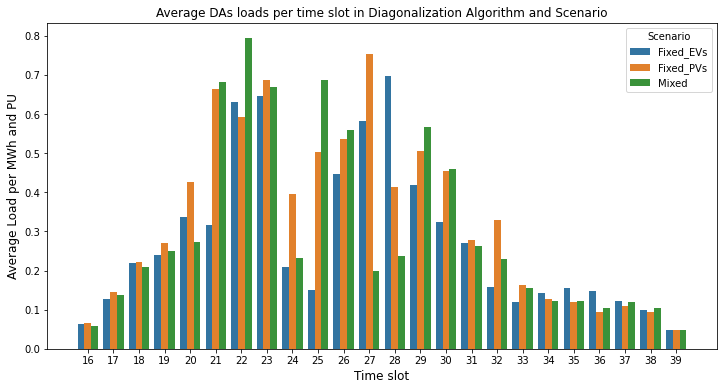

In [34]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_diag[['DAs_load','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='DAs_load', hue="Scenario" , ax=ax)

ax.set_title('Average DAs loads per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

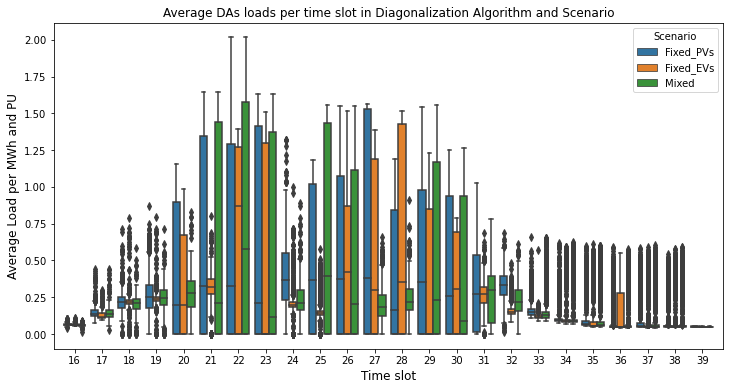

In [35]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=df_all_diag[['DAs_load','Scenario', 'Time']], 
            x='Time', y='DAs_load', hue="Scenario" , ax=ax)

ax.set_title('Average DAs loads per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

In [36]:
# fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
# ax = fig.subplots(1,1)

# sns.swarmplot(data=df_all_diag[['DAs_load','Scenario', 'Time']], 
#             x='Time', y='DAs_load', hue="Scenario" , ax=ax)

# ax.set_title('Average DAs loads per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

# ax.set_xlabel('Time slot', fontsize=12)
# ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

# ax.plot()
# plt.show()

#### AHE loads

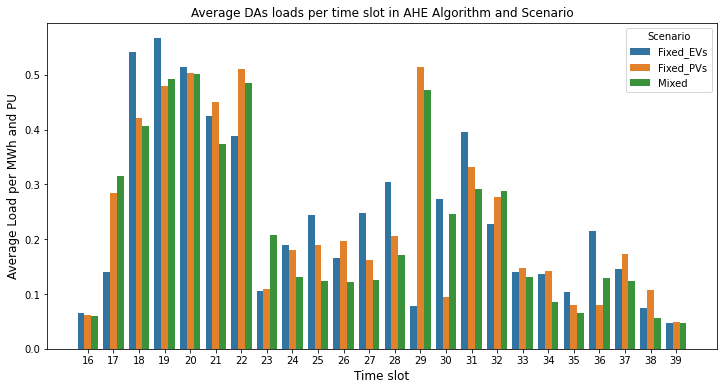

In [41]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_ahe[['DAs_load','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='DAs_load', hue="Scenario" , ax=ax)

ax.set_title('Average DAs loads per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

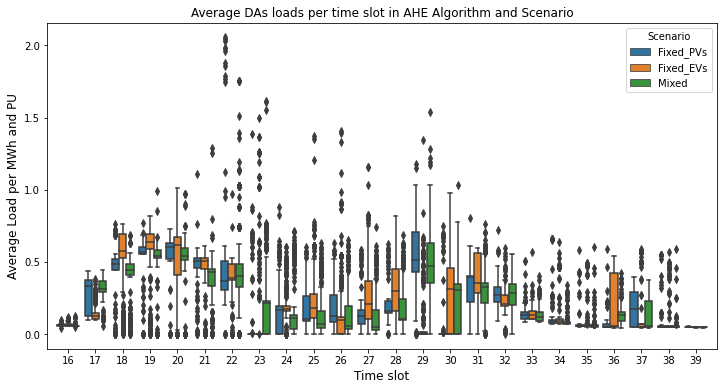

In [42]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=df_all_ahe[['DAs_load','Scenario', 'Time']], 
            x='Time', y='DAs_load', hue="Scenario" , ax=ax)

ax.set_title('Average DAs loads per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

<Figure size 576x432 with 0 Axes>

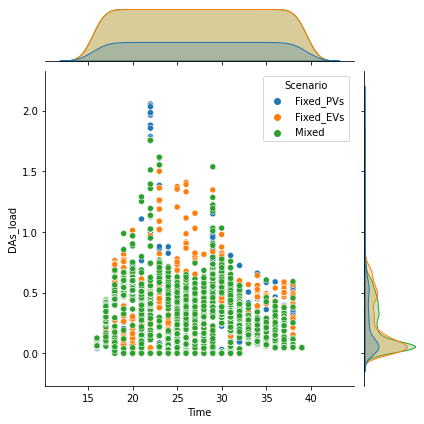

In [49]:
fig = plt.figure(figsize=(8,6)) #figsize=(8,6)
# ax = fig.subplots(1,1)
sns.jointplot(
    data=df_all_ahe[['DAs_load','Scenario', 'Time']], 
            x='Time', y='DAs_load', hue="Scenario" , ax=ax ) # ,kind="kde"


## 4.2.1 Plot Average Demands for each algorithm

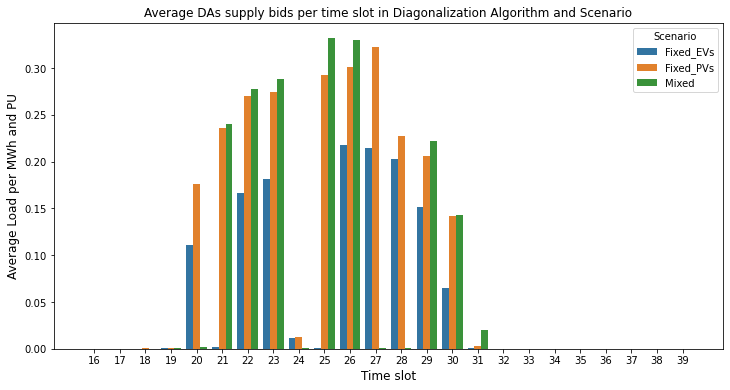

In [51]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_diag[['DAs_generation','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='DAs_generation', hue="Scenario" , ax=ax)

ax.set_title('Average DAs supply bids per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

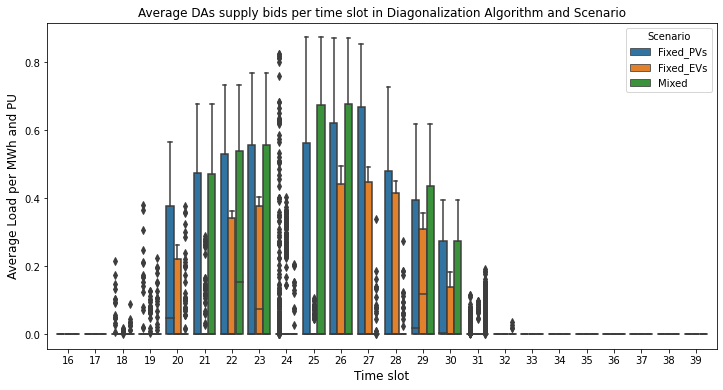

In [53]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=df_all_diag[['DAs_generation','Scenario', 'Time']], 
            x='Time', y='DAs_generation', hue="Scenario" , ax=ax)

ax.set_title('Average DAs supply bids per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

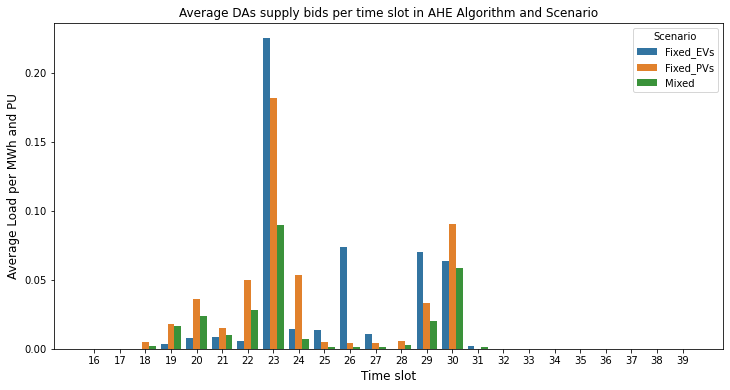

In [54]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_ahe[['DAs_generation','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='DAs_generation', hue="Scenario" , ax=ax)

ax.set_title('Average DAs supply bids per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

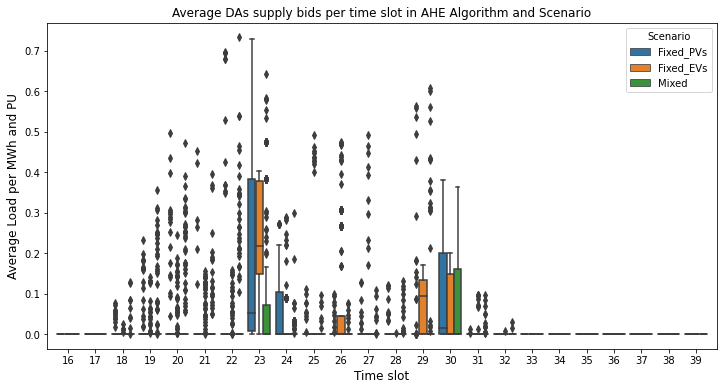

In [55]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=df_all_ahe[['DAs_generation','Scenario', 'Time']], 
            x='Time', y='DAs_generation', hue="Scenario" , ax=ax)

ax.set_title('Average DAs supply bids per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Load per MWh and PU', fontsize=12)

ax.plot()
plt.show()

### 4.2.2) plot based on average EVs charge Diagonalization Algorithm

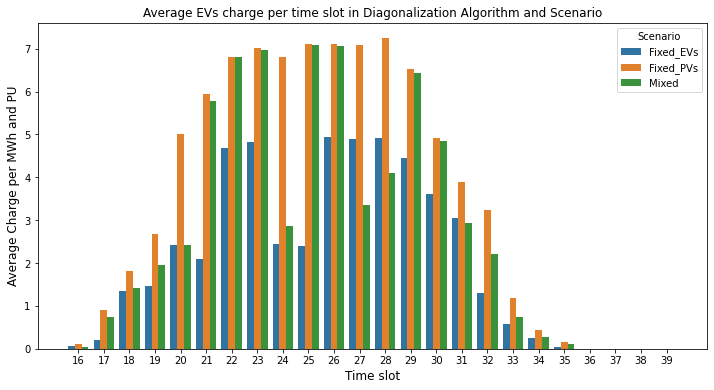

In [37]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_diag[['EVs_Charge','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='EVs_Charge', hue="Scenario" , ax=ax)

ax.set_title('Average EVs charge per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Charge per MWh and PU', fontsize=12)

ax.plot()
plt.show()

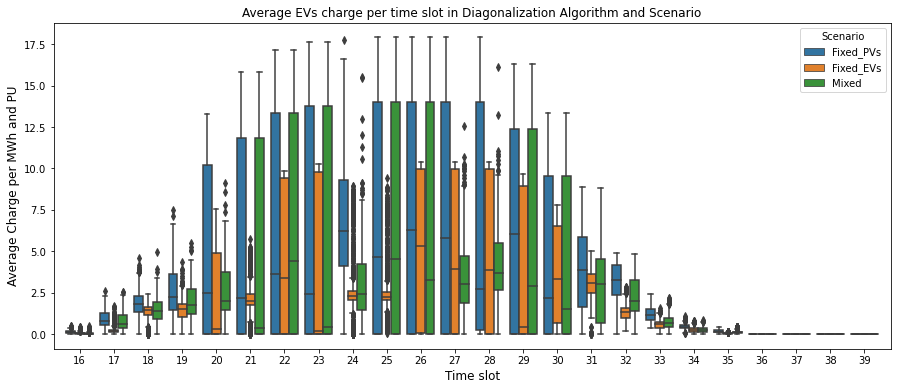

In [38]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)


sns.boxplot(data=df_all_diag[['EVs_Charge','Scenario', 'Time']], 
            x='Time', y='EVs_Charge', hue="Scenario" , ax=ax) #dodge=False,

ax.set_title('Average EVs charge per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Charge per MWh and PU', fontsize=12)

ax.plot()
plt.show()

### 4.2.3) plot based on average EVs charge AHE Algorithm

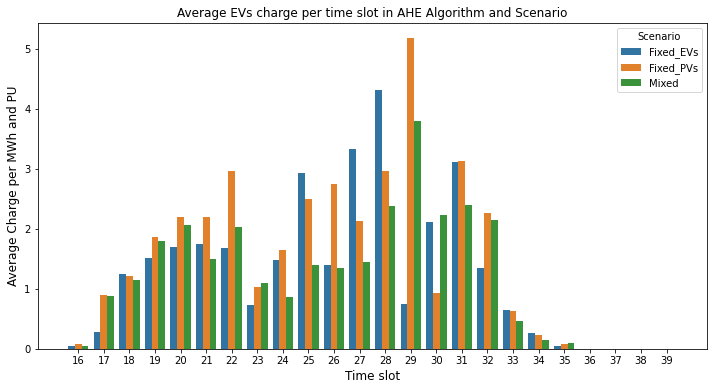

In [39]:
fig = plt.figure(figsize=(12,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=df_all_ahe[['EVs_Charge','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='EVs_Charge', hue="Scenario" , ax=ax)

ax.set_title('Average EVs charge per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Charge per MWh and PU', fontsize=12)

ax.plot()
plt.show()

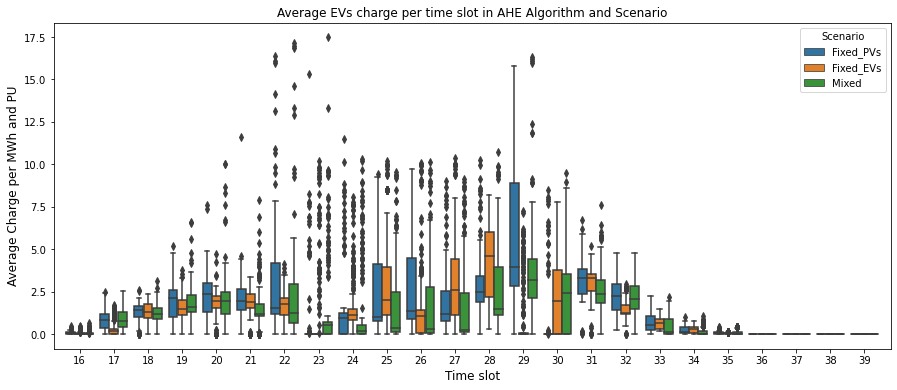

In [40]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)


sns.boxplot(data=df_all_ahe[['EVs_Charge','Scenario', 'Time']], 
            x='Time', y='EVs_Charge', hue="Scenario" , ax=ax) #dodge=False,

ax.set_title('Average EVs charge per time slot in AHE Algorithm and Scenario', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Charge per MWh and PU', fontsize=12)

ax.plot()
plt.show()

### 4.2.4) Plot based on Average EVs Disharge  Algorithms

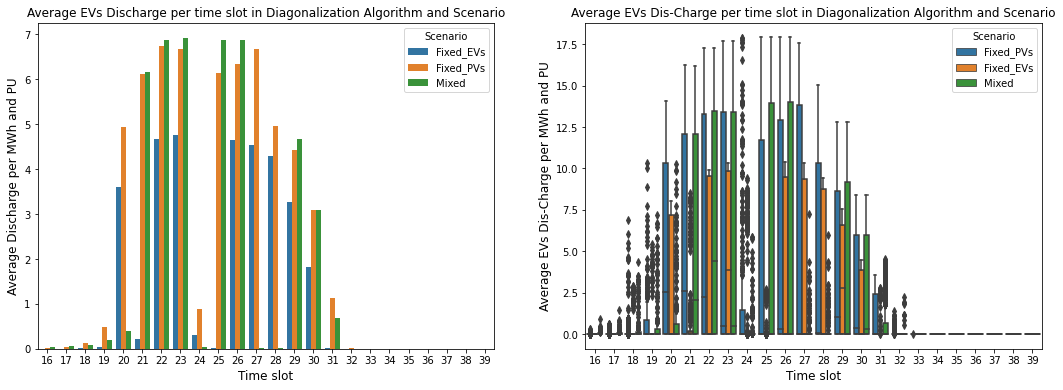

In [60]:
fig = plt.figure(figsize=(18,6)) #figsize=(8,6)
ax = fig.subplots(1,2)

sns.barplot(data=df_all_diag[['EVs_Discharge','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='EVs_Discharge', hue="Scenario" , ax=ax[0])

ax[0].set_title('Average EVs Discharge per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax[0].set_xlabel('Time slot', fontsize=12)
ax[0].set_ylabel('Average Discharge per MWh and PU', fontsize=12)

#################################################################################################

sns.boxplot(data=df_all_diag[['EVs_Discharge','Scenario', 'Time']], 
            x='Time', y='EVs_Discharge', hue="Scenario" , ax=ax[1]) #dodge=False,

ax[1].set_title('Average EVs Dis-Charge per time slot in Diagonalization Algorithm and Scenario', fontsize=12)

ax[1].set_xlabel('Time slot', fontsize=12)
ax[1].set_ylabel('Average EVs Dis-Charge per MWh and PU', fontsize=12)


plt.show()

In [56]:
df_all_diag.columns

Index(['Iteration', 'DAs_load', 'DAs_generation', 'DAs_demand_bid',
       'DAs_supply_offer', 'EVs_Charge', 'EVs_Discharge', 'TCL_Power',
       'SL_Power', 'Inflexible_loads', 'Solar_Power', 'Gen1', 'Gen2', 'Gen3',
       'Gen4', 'CDA1_supply', 'CDA2_supply', 'CDA3_supply', 'CDA4_supply',
       'CDA5_supply', 'CDA6_supply', 'CDA7_supply', 'CDA8_supply',
       'CDA1_demand', 'CDA2_demand', 'CDA3_demand', 'CDA4_demand',
       'CDA5_demand', 'CDA6_demand', 'CDA7_demand', 'CDA8_demand',
       'Bus1_price', 'Bus2_price', 'Bus3_price', 'Bus4_price', 'Bus5_price',
       'Bus6_price', 'Theta_bus_1', 'Theta_bus_2', 'Theta_bus_3',
       'Theta_bus_4', 'Theta_bus_5', 'Theta_bus_6', 'Time', 'DA', 'Algorithm',
       'Scenario'],
      dtype='object')

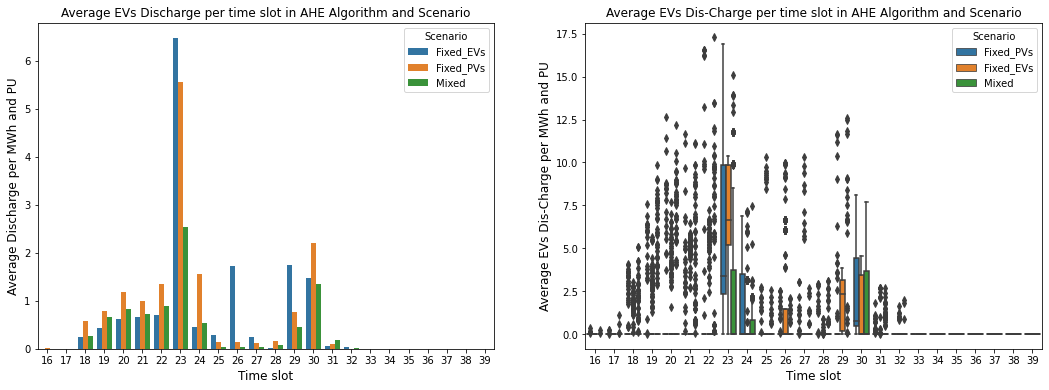

In [61]:
fig = plt.figure(figsize=(18,6)) #figsize=(8,6)
ax = fig.subplots(1,2)

sns.barplot(data=df_all_ahe[['EVs_Discharge','Scenario', 'Time']].groupby(['Time','Scenario']).mean().reset_index(), 
            x='Time', y='EVs_Discharge', hue="Scenario" , ax=ax[0])

ax[0].set_title('Average EVs Discharge per time slot in AHE Algorithm and Scenario', fontsize=12)

ax[0].set_xlabel('Time slot', fontsize=12)
ax[0].set_ylabel('Average Discharge per MWh and PU', fontsize=12)

#################################################################################################

sns.boxplot(data=df_all_ahe[['EVs_Discharge','Scenario', 'Time']], 
            x='Time', y='EVs_Discharge', hue="Scenario" , ax=ax[1]) #dodge=False,

ax[1].set_title('Average EVs Dis-Charge per time slot in AHE Algorithm and Scenario', fontsize=12)

ax[1].set_xlabel('Time slot', fontsize=12)
ax[1].set_ylabel('Average EVs Dis-Charge per MWh and PU', fontsize=12)


plt.show()

# 5) Plot based on price

In [62]:
bus_price = ['Bus1_price', 'Bus2_price', 'Bus3_price', 'Bus4_price', 'Bus5_price','Bus6_price']

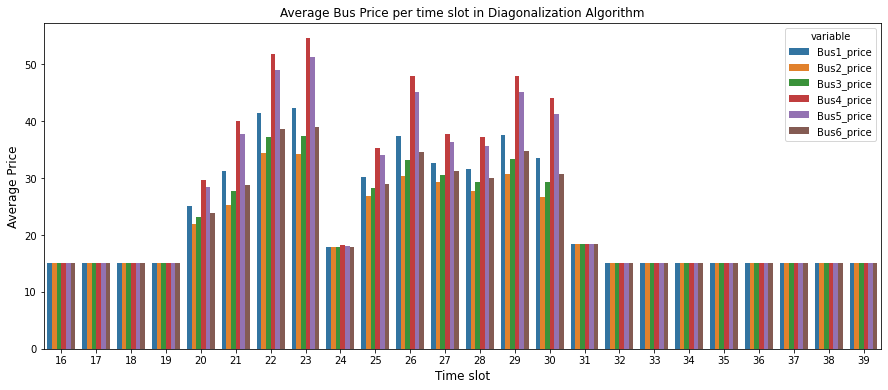

In [78]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=pd.melt( df_all_diag[[*bus_price, *['Time']]].groupby(['Time',]).mean().reset_index(), id_vars=['Time']),
                         x='Time', y='value',hue='variable', ax=ax)

ax.set_title('Average Bus Price per time slot in Diagonalization Algorithm', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)



plt.show()

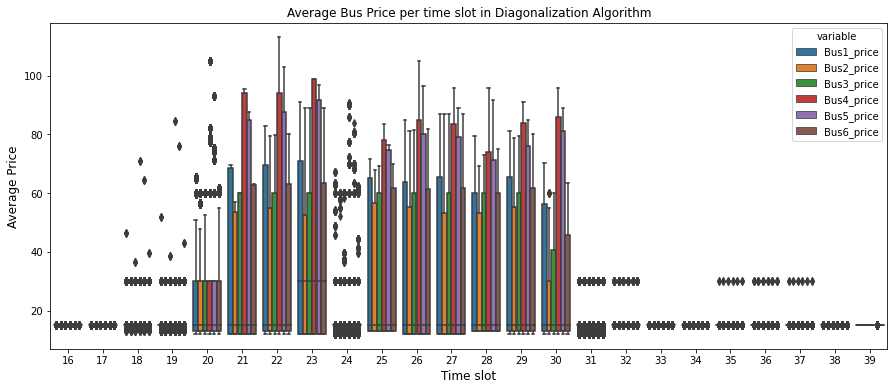

In [79]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=pd.melt( df_all_diag[[*bus_price, *['Time']]], id_vars=['Time']),
                         x='Time', y='value',hue='variable', ax=ax)

ax.set_title('Average Bus Price per time slot in Diagonalization Algorithm', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)


plt.show()

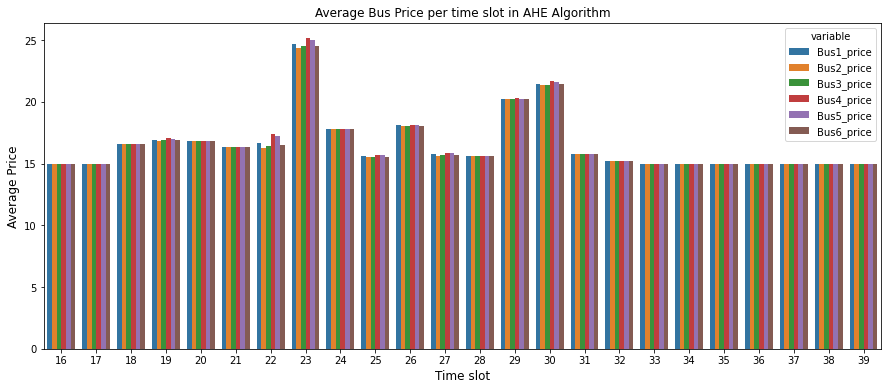

In [80]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.barplot(data=pd.melt( df_all_ahe[[*bus_price, *['Time']]].groupby(['Time',]).mean().reset_index(), id_vars=['Time']),
                         x='Time', y='value',hue='variable', ax=ax)

ax.set_title('Average Bus Price per time slot in AHE Algorithm', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)



plt.show()

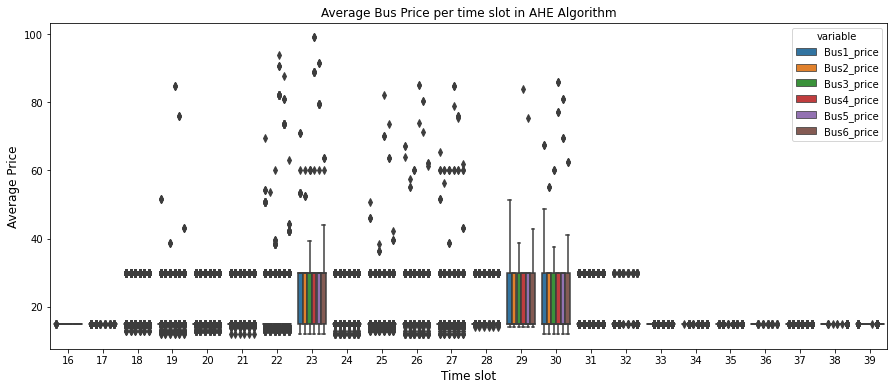

In [81]:
fig = plt.figure(figsize=(15,6)) #figsize=(8,6)
ax = fig.subplots(1,1)

sns.boxplot(data=pd.melt( df_all_ahe[[*bus_price, *['Time']]], id_vars=['Time']),
                         x='Time', y='value',hue='variable', ax=ax)

ax.set_title('Average Bus Price per time slot in AHE Algorithm', fontsize=12)

ax.set_xlabel('Time slot', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)


plt.show()

# 6) Last bus price before termination for each algorithm

In [ ]:
# df_all = [df_PVs_AHE, df_EVs_AHE, df_Mixed_AHE , df_PVs_Diag,  df_EVs_Diag,  df_Mixed_Diag]
# scenarios =['Fixed_PVs', 'Fixed_EVs', 'Mixed']
# algorithms  = ['AHE', 'Diag']

